In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
from nltk.corpus import stopwords as nltk_stopwords

# Value Pulse Check Survey Data

**Content of the File:** 
Performing exploratory data analysis and sentiment analysis on the Value Pulse check data to gain valuable insights. 

**Description of the data:**
The dataset contains answers of a internally conducted survey at HUGO BOSS. Each row is a single response and contains the answers and characteristics of the responder. 

### Data Cleaning

In [2]:
df = pd.read_excel('Values Pulse Check 2023_Overall_Raw Data.xlsx', header=1)
df

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Please feel free to share your ideas how to live out our HUGO BOSS values even more.,Please feel free to share an example when you experienced one of our values being fully lived out.,Please feel free to share your feedback regarding the survey.,Please select the country you are based in - Country,Please select the division you are mainly working for (primary focus) - Division,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Q_DataPolicyViolations
0,2023-09-12 03:11:49,2023-09-12 03:13:19,IP Address,100,89,True,2023-09-12 03:13:20.383,R_1pRUTyBgkNwvAYP,anonymous,EN,...,NaN,NaN,NaN,Netherlands,Finance,White Collar,Yes,1-3 years,43 - 50,NaN
1,2023-09-12 03:11:17,2023-09-12 03:14:04,IP Address,100,167,True,2023-09-12 03:14:07.643,R_1hyeEVfBaaLQHMx,anonymous,DE,...,NaN,NaN,NaN,Germany,Strategy,White Collar,No,> 10 years,35 - 42,NaN
2,2023-09-12 03:12:49,2023-09-12 03:14:20,IP Address,100,90,True,2023-09-12 03:14:21.143,R_1Ej8fvcSjUst3CG,anonymous,DE,...,NaN,NaN,NaN,Germany,IT,White Collar,No,5-10 years,27 - 34,NaN
3,2023-09-12 03:11:35,2023-09-12 03:14:31,IP Address,100,176,True,2023-09-12 03:14:32.060,R_eFkLUcRgIEsGJm9,anonymous,DE,...,NaN,NaN,NaN,Germany,Logistics,White Collar,No,3-5 years,27 - 34,NaN
4,2023-09-12 03:12:27,2023-09-12 03:14:38,IP Address,100,130,True,2023-09-12 03:14:39.785,R_2Vy8xIgO00atLyo,anonymous,EN,...,NaN,NaN,NaN,Switzerland,Procurement,No answer,No,1-3 years,27 - 34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,2023-10-04 11:46:42,2023-10-04 11:49:34,IP Address,79,172,False,2023-10-09 04:07:07.219,R_3QLtUy297SMcwqd,qr,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3500,2023-10-03 10:11:07,2023-10-03 10:13:20,IP Address,28,133,False,2023-10-09 04:07:07.422,R_3iz1gVKCSLqG8hT,qr,EN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3501,2023-10-02 05:49:01,2023-10-02 05:50:13,IP Address,28,72,False,2023-10-09 04:07:07.867,R_3r0B7wSGT06NBx1,anonymous,ES-ES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3502,2023-10-02 06:00:50,2023-10-02 06:06:01,IP Address,79,310,False,2023-10-09 04:07:08.014,R_1l4rS5KvgAP1mbX,anonymous,ES-ES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(3504, 40)

In [4]:
#check for unique values
df.nunique()

Start Date                                                                                                             3453
End Date                                                                                                               3453
Response Type                                                                                                             1
Progress                                                                                                                  5
Duration (in seconds)                                                                                                  1127
Finished                                                                                                                  2
Recorded Date                                                                                                          3504
Response ID                                                                                                            3504
Distribu

We can see that for alot of the questions, there are only 6 possible answers.

In [5]:
# drop the status column 
df = df.drop(['Start Date', 'End Date', 'Response Type', 'Recorded Date', 'Response ID' ,'Q_DataPolicyViolations'] , axis=1)

In [6]:
print(df.shape)

(3504, 34)


In [7]:
df.notnull().sum()

Progress                                                                                                               3504
Duration (in seconds)                                                                                                  3504
Finished                                                                                                               3504
Distribution Channel                                                                                                   3504
User Language                                                                                                          3504
How important is a values-based working culture to you?                                                                3451
How closely do you feel connected to HUGO BOSS?                                                                        3444
How well informed do you feel about the HUGO BOSS values?                                                              3444
How well

In [8]:
#rename the columns for easier access
df.rename(columns={    'How important is a values-based working culture to you?': 'Values-based working culture',
       'How closely do you feel connected to HUGO BOSS?': 'Connected to HUGO BOSS',
       'How well informed do you feel about the HUGO BOSS values?': 'Informed about HUGO BOSS values',
       'How well do you believe the HUGO BOSS values are lived out across  the organisation?': 'Values lived out across the organisation',
       'How well do you believe the HUGO BOSS values are lived out  in the day-to-day business in your division?': 'Values lived out in the day-to-day business',
       'How strongly do the HUGO BOSS Values positively influence the working atmosphere in your division?': 'Values positively influence the working atmosphere',
       'To what extent do you believe the HUGO BOSS values have a positive influence on your motivation and engagement?': 'Values have a positive influence on your motivation and engagement',
       'How well do you believe the HUGO BOSS values support you at work (e.g. for decision-making)?': 'Values support you at work',
       'How important do you think the value TRUST is in your division?': 'Importance of TRUST',
       'In your opinion, how well is the value TRUST already reflected in the daily work of your division?': 'TRUST reflected daily',
       'How important do you think the value ENTREPRENEURIAL SPIRIT is in your division?': 'Importance of ENTREPRENEURIAL SPIRIT',
       'In your opinion, how well is the value ENTREPRENEURIAL SPIRIT already reflected in the daily work of your division?': 'ENTREPRENEURIAL SPIRIT reflected daily',
       'How important do you think the value YOUTHFUL SPIRIT is in your division?': 'Importance of YOUTHFUL SPIRIT',
       'In your opinion, how well is the value YOUTHFUL SPIRIT already reflected in the daily work of your division?': 'YOUTHFUL SPIRIT reflected daily',
       'How important do you think the value SIMPLICITY & QUALITY is in your division?': 'Importance of SIMPLICITY & QUALITY',
       'In your opinion, how well is the value SIMPLICITY & QUALITY already reflected in the daily work of your division?': 'SIMPLICITY & QUALITY reflected daily',
       'How important do you think the value TEAM MENTALITY is in your division?': 'Importance of TEAM MENTALITY',
       'In your opinion, how well is the value TEAM MENTALITY already reflected in the daily work of your division?': 'TEAM MENTALITY reflected daily',
       'How important do you think the value PERSONAL OWNERSHIP is in your division?': 'Importance of PERSONAL OWNERSHIP',
       'In your opinion, how well is the value PERSONAL OWNERSHIP already reflected in the daily work of your division?': 'PERSONAL OWNERSHIP reflected daily'}, inplace=True)



In [9]:
df.head()

,Progress,Duration (in seconds),Finished,Distribution Channel,User Language,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,...,PERSONAL OWNERSHIP reflected daily,Please feel free to share your ideas how to live out our HUGO BOSS values even more.,Please feel free to share an example when you experienced one of our values being fully lived out.,Please feel free to share your feedback regarding the survey.,Please select the country you are based in - Country,Please select the division you are mainly working for (primary focus) - Division,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?
0,100,89,True,anonymous,EN,Important,Strongly,Well informed,Satisfactory,Well,...,Poor,NaN,NaN,NaN,Netherlands,Finance,White Collar,Yes,1-3 years,43 - 50
1,100,167,True,anonymous,DE,Very important,Very strongly,Very well informed,Well,Well,...,Well,NaN,NaN,NaN,Germany,Strategy,White Collar,No,> 10 years,35 - 42
2,100,90,True,anonymous,DE,Neutral,Strongly,Informed,Well,Satisfactory,...,Very poor,NaN,NaN,NaN,Germany,IT,White Collar,No,5-10 years,27 - 34
3,100,176,True,anonymous,DE,Important,Neutral,Very well informed,Poor,Poor,...,Poor,NaN,NaN,NaN,Germany,Logistics,White Collar,No,3-5 years,27 - 34
4,100,130,True,anonymous,EN,Important,Very strongly,Well informed,Very well,Very well,...,Well,NaN,NaN,NaN,Switzerland,Procurement,No answer,No,1-3 years,27 - 34


In [10]:
#any columns that are all NaN are dropped
df = df.dropna(axis=1, how='all')
df.shape

(3504, 34)

In [11]:
#get the data type of the columns 
df.dtypes

Progress                                                                                               int64
Duration (in seconds)                                                                                  int64
Finished                                                                                                bool
Distribution Channel                                                                                  object
User Language                                                                                         object
Values-based working culture                                                                          object
Connected to HUGO BOSS                                                                                object
Informed about HUGO BOSS values                                                                       object
Values lived out across the organisation                                                              object
Values lived out in

### Adding Functional Groups

In [12]:
# Mapping dictionary
mapping = {
    'Finance': 'Corporate & Administrative',
    'Strategy': 'Corporate & Administrative',
    'IT': 'IT & Technical Services',
    'Logistics': 'Logistics & Operations',
    'Procurement': 'Logistics & Operations',
    'Merchandise Management': 'Sales & Retail',
    'Global eCommerce': 'Sales & Retail',
    'Other': 'Corporate & Administrative',
    'Human Resources': 'Corporate & Administrative',
    'Construction & Facility Management': 'Logistics & Operations',
    'Retail Store': 'Sales & Retail',
    'Controlling': 'Corporate & Administrative',
    'Retail Operations': 'Sales & Retail',
    'Sustainability': 'Corporate & Administrative',
    'Legal': 'Corporate & Administrative',
    'No answer': 'Corporate & Administrative',
    'Product Development & Operations': 'Creative & Brand Functions',
    'Business Unit BOSS Menswear': 'Creative & Brand Functions',
    'Corporate Communications': 'Corporate & Administrative',
    'Marketing & Brand Communications': 'Creative & Brand Functions',
    'Business Unit HUGO': 'Creative & Brand Functions',
    'Business Units Ticino': 'Creative & Brand Functions',
    'Global Retail': 'Sales & Retail',
    'eCommerce': 'Sales & Retail',
    'Business Unit BOSS Womenswear': 'Creative & Brand Functions',
    'Internal Audit': 'Corporate & Administrative',
    'Technical Center': 'IT & Technical Services',
    'Retail Management': 'Sales & Retail',
    'Licences': 'External & Partnerships',
    'Sourcing & Production': 'Logistics & Operations',
    'Store Design & Visual Merchandising': 'Creative & Brand Functions',
    'Materials Management': 'Logistics & Operations',
    'Global Travel Retail': 'Sales & Retail',
    'Retail Services': 'Sales & Retail',
    'Digital Excellence': 'IT & Technical Services',
    'Production Izmir - Jersey': 'Logistics & Operations',
    'Production Izmir - Womenswear': 'Logistics & Operations',
    'Production Izmir- Menswear (Suit)': 'Logistics & Operations',
    'Production Izmir - Shirt': 'Logistics & Operations',
    'Real Estate Management': 'Logistics & Operations',
    "Log. Distrib. Centers/Raw Mat. W'house": 'Logistics & Operations',
    'CRM': 'IT & Technical Services',
    #np.nan: 'Corporate & Administrative',
    'Investor Relations': 'External & Partnerships',
    'Travel Retail': 'Sales & Retail'
}

# Convert the array into a pandas DataFrame for easy mapping
# Map the departments to the functional groups
df['Functional Group'] = df['Please select the division you are mainly working for (primary focus) - Division'].map(mapping)

df

,Progress,Duration (in seconds),Finished,Distribution Channel,User Language,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,...,Please feel free to share your ideas how to live out our HUGO BOSS values even more.,Please feel free to share an example when you experienced one of our values being fully lived out.,Please feel free to share your feedback regarding the survey.,Please select the country you are based in - Country,Please select the division you are mainly working for (primary focus) - Division,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group
0,100,89,True,anonymous,EN,Important,Strongly,Well informed,Satisfactory,Well,...,NaN,NaN,NaN,Netherlands,Finance,White Collar,Yes,1-3 years,43 - 50,Corporate & Administrative
1,100,167,True,anonymous,DE,Very important,Very strongly,Very well informed,Well,Well,...,NaN,NaN,NaN,Germany,Strategy,White Collar,No,> 10 years,35 - 42,Corporate & Administrative
2,100,90,True,anonymous,DE,Neutral,Strongly,Informed,Well,Satisfactory,...,NaN,NaN,NaN,Germany,IT,White Collar,No,5-10 years,27 - 34,IT & Technical Services
3,100,176,True,anonymous,DE,Important,Neutral,Very well informed,Poor,Poor,...,NaN,NaN,NaN,Germany,Logistics,White Collar,No,3-5 years,27 - 34,Logistics & Operations
4,100,130,True,anonymous,EN,Important,Very strongly,Well informed,Very well,Very well,...,NaN,NaN,NaN,Switzerland,Procurement,No answer,No,1-3 years,27 - 34,Logistics & Operations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,79,172,False,qr,EN,Very important,Neutral,Informed,Satisfactory,Satisfactory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3500,28,133,False,qr,EN,Very important,Strongly,Well informed,Well,Well,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3501,28,72,False,anonymous,ES-ES,Very important,Neutral,Informed,Satisfactory,Very poor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3502,79,310,False,anonymous,ES-ES,Less important,Strongly,Very well informed,Very well,Well,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duration (in seconds)

In [13]:
df['Duration (in seconds)'].mean()


4777.8125

In [14]:
#calculate the average 'Duration' for each group in the occupational column
df.groupby('Which occupational group are you a part of?')['Duration (in seconds)'].mean()

Which occupational group are you a part of?
Blue Collar     3427.739950
No answer       2610.155689
White Collar    4164.491484
Name: Duration (in seconds), dtype: float64

In [15]:
df.groupby('Are you currently in a leadership position?')['Duration (in seconds)'].mean()

Are you currently in a leadership position?
No           2992.851972
No answer    2963.747899
Yes          5158.001511
Name: Duration (in seconds), dtype: float64

In [16]:
df.groupby('How long have you been working at HUGO BOSS?')['Duration (in seconds)'].mean()

How long have you been working at HUGO BOSS?
1-3 years     2008.056634
3-5 years     6079.330435
5-10 years    2899.074492
< 1 year      2571.908582
> 10 years    4526.759542
No answer     5344.733333
Name: Duration (in seconds), dtype: float64

In [17]:
df.groupby('How old are you?')['Duration (in seconds)'].mean()

How old are you?
27 - 34      1795.261842
35 - 42      5667.157347
43 - 50      4829.960177
51 - 58      3380.802817
No answer    3275.170616
≤ 26         1023.951299
≥ 59          666.634146
Name: Duration (in seconds), dtype: float64

In [18]:
df.groupby('Functional Group')['Duration (in seconds)'].mean()


Functional Group
Corporate & Administrative    5772.515913
Creative & Brand Functions     975.993064
External & Partnerships        404.500000
IT & Technical Services       4204.040698
Logistics & Operations        5143.010703
Sales & Retail                2794.402464
Name: Duration (in seconds), dtype: float64

## Text Responses

In [19]:
#drop the rows that have value 1 
df = df[df['Values-based working culture'] != 1]

In [20]:
#drop the rows where there is no response for the text_columns 
text_columns = ['Please feel free to share your ideas how to live out our HUGO BOSS values even more.',
                'Please feel free to share an example when you experienced one of our values being fully lived out.',
                'Please feel free to share your feedback regarding the survey.']

#drop the rows where any of the text_columns is NaN
df_text_responses = df.dropna(subset=text_columns, how='any')
df_text_responses.shape

(407, 35)

In [21]:
# Extract relevant columns for free-text analysis (Q20, Q21, Q22)
text_columns = ['Please feel free to share your ideas how to live out our HUGO BOSS values even more.',
                'Please feel free to share an example when you experienced one of our values being fully lived out.',
                'Please feel free to share your feedback regarding the survey.']
#df_text_responses = df[text_columns].dropna()

# Perform sentiment analysis using TextBlob for each of the text columns
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  

# Apply sentiment analysis to each column (Q20, Q21, Q22)
df_text_responses['Sentiment_1'] = df_text_responses['Please feel free to share your ideas how to live out our HUGO BOSS values even more.'].apply(analyze_sentiment)
df_text_responses['Sentiment_2'] = df_text_responses['Please feel free to share an example when you experienced one of our values being fully lived out.'].apply(analyze_sentiment)
df_text_responses['Sentiment_3'] = df_text_responses['Please feel free to share your feedback regarding the survey.'].apply(analyze_sentiment)


df_text_responses


/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25506/2283572400.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text_responses['Sentiment_1'] = df_text_responses['Please feel free to share your ideas how to live out our HUGO BOSS values even more.'].apply(analyze_sentiment)
/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25506/2283572400.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text_responses['Sentiment_2'] = df_text_responses['Please feel free to share an examp

,Progress,Duration (in seconds),Finished,Distribution Channel,User Language,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,...,Please select the country you are based in - Country,Please select the division you are mainly working for (primary focus) - Division,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group,Sentiment_1,Sentiment_2,Sentiment_3
17,100,280,True,anonymous,IT,Very important,Strongly,Very well informed,Very well,Very well,...,Italy,Retail Store,White Collar,Yes,> 10 years,43 - 50,Sales & Retail,0.000000,0.000000,0.000
20,100,343,True,anonymous,EN,Very important,Strongly,Well informed,Satisfactory,Very well,...,Germany,Legal,White Collar,Yes,1-3 years,43 - 50,Corporate & Administrative,0.093019,0.300000,0.000
25,100,320,True,anonymous,ES-ES,Very important,Strongly,Very well informed,Well,Well,...,Spain,Business Unit BOSS Menswear,White Collar,No,3-5 years,43 - 50,Creative & Brand Functions,0.000000,0.000000,0.000
36,100,307,True,anonymous,EN,Very important,Very strongly,Very well informed,Poor,Well,...,Germany,Merchandise Management,White Collar,Yes,5-10 years,51 - 58,Sales & Retail,0.136364,0.250000,0.700
52,100,113,True,anonymous,ZH-T,Very important,Very strongly,Very well informed,Very well,Very well,...,Greater China,Business Unit BOSS Menswear,No answer,Yes,< 1 year,27 - 34,Creative & Brand Functions,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,100,488,True,anonymous,EN,Very important,Very strongly,Very well informed,Very well,Very well,...,Dubai,Other,White Collar,Yes,1-3 years,43 - 50,Corporate & Administrative,0.450000,0.403125,0.390
3420,100,406,True,anonymous,EN,Very important,Strongly,Very well informed,Very well,Well,...,Denmark,Retail Store,No answer,No,< 1 year,43 - 50,Sales & Retail,0.000000,-0.122917,0.400
3433,100,2009,True,qr,EN,Neutral,Not at all,Somewhat informed,Very poor,Very poor,...,United States,Log. Distrib. Centers/Raw Mat. W'house,White Collar,No,> 10 years,51 - 58,Logistics & Operations,-0.019545,-0.157576,-0.175
3440,100,516,True,anonymous,ES-ES,Very important,Very strongly,Very well informed,Very well,Very well,...,Mexico,Business Unit BOSS Menswear,Blue Collar,No,1-3 years,43 - 50,Creative & Brand Functions,0.000000,0.000000,0.000


In [22]:
print('Please feel free to share your ideas how to live out our HUGO BOSS values even more.', df_text_responses['Sentiment_1'].mean())
print('Please feel free to share an example when you experienced one of our values being fully lived out.', df_text_responses['Sentiment_2'].mean())
print('Please feel free to share your feedback regarding the survey.', df_text_responses['Sentiment_3'].mean())

Please feel free to share your ideas how to live out our HUGO BOSS values even more. 0.06349200305811876
Please feel free to share an example when you experienced one of our values being fully lived out. 0.03900460536012484
Please feel free to share your feedback regarding the survey. 0.1048583947731675


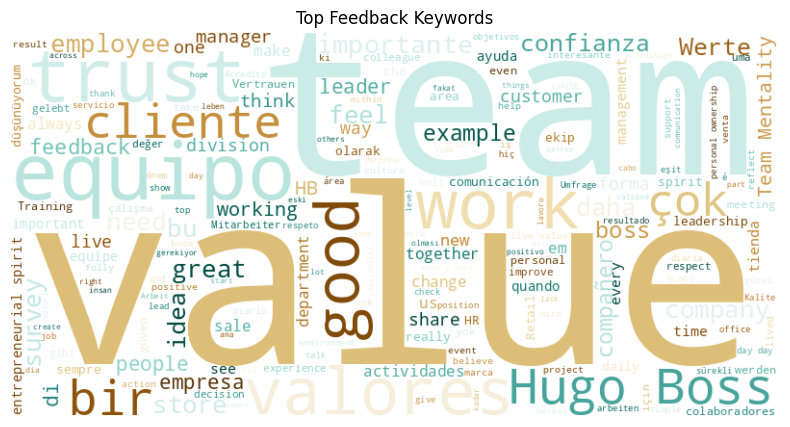

In [23]:
# Load stop words for German, Spanish, and French
stopwords_urls = {
    'german': 'https://raw.githubusercontent.com/solariz/german_stopwords/master/german_stopwords_plain.txt',
    'spanish': 'https://raw.githubusercontent.com/stopwords-iso/stopwords-es/master/stopwords-es.txt',
    'french': 'https://raw.githubusercontent.com/stopwords-iso/stopwords-fr/master/stopwords-fr.txt',
}

# Combine all stopwords into a single set
stopwords = set(nltk_stopwords.words('english'))  # Add English stopwords using NLTK

# Add stop words for other languages
for lang, url in stopwords_urls.items():
    response = requests.get(url)
    stopwords.update(response.text.splitlines())

# Combine feedback text columns into a single text string
feedback_text = ' '.join(df_text_responses['Please feel free to share your ideas how to live out our HUGO BOSS values even more.'].dropna().tolist() + 
                         df_text_responses['Please feel free to share an example when you experienced one of our values being fully lived out.'].dropna().tolist() + 
                         df_text_responses['Please feel free to share your feedback regarding the survey.'].dropna().tolist())

# Remove stopwords from feedback_text
feedback_text = ' '.join([word for word in feedback_text.split() if word.lower() not in stopwords])

# Generate the word cloud with the 'BrBG' colormap to resemble Brwnyl
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='BrBG').generate(feedback_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Feedback Keywords')
plt.show()


The average sentiment scores represent the overall sentiment polarity of the responses for each of these questions. Here's how to interpret the results:

Sentiment scores range from -1 to 1:
* -1 indicates very negative sentiment.
* 0 indicates neutral sentiment.
* 1 indicates very positive sentiment.

All three scores are positive but close to neutral, which suggests that while the responses are generally positive, they are not strongly positive. The feedback from participants might reflect a balanced view with some positive opinions but without strong enthusiasm.



In [24]:
#print some sample feedback 
df_text_responses['Please feel free to share your ideas how to live out our HUGO BOSS values even more.'].sample(5).tolist()

['雇用形態に関係なく、そこで勤務する全てのStaffが同じ気持ちを共有して挑むことが重要であると思います。そのために、ストアマネージャーからの伝達だけではなく、全雇用Staffが会社の現状や想いを共有出来るように、店長会などの模様をInstagramなどでの配信し、直接その場の臨場感を感じてもらうと良いと思います。',
 'cotidianamente',
 'Tamamen ortak kararlarla ve güven desteğiyle mükemmellik sağlanabilir ',
 'Deep dive into product knowledge through personal ownership',
 'Man sollte die Vorgesetzten noch mehr bewerten können, unabhängig zum GPTW. Wichtig finde ich es im Standort Metzingen das es nicht zu Amerikanisch wird.']

In [25]:
df_text_responses['Please feel free to share an example when you experienced one of our values being fully lived out.'].sample(5).tolist()

['Acredito que o reconhecimento do esforço e trabalho juntamente com uma remuneração justa sempre será o caminho para o sucesso.E é assim que me sinto, nestes 11 meses, onde faço parte dessa família.',
 'deger gördüğümü fark edildigimi yada calisan olarak guven duydugum bir deneyimim maalesef olmadi',
 'Trust bei der Arbeit hat eine höhere Motivation zur Folge',
 'Prozessoptimierungen mit der Dokumentation durch Excel',
 'Apoyarnos mutuamente en ventas ']

In [26]:
df_text_responses['Please feel free to share your feedback regarding the survey.'].sample(5).tolist()

['Anketler genel anlamda bilginin ne düzeyde olduğunu gösteremeyebilir çünkü bazen verilen cevaplar sadece cevap vermek amaçlı olabilir bundan ötürü anketlerle birlikte ekstra bilgilendirmeler yapılabilir.konferans vs gibi.',
 'N/a',
 'Good to do and check in.',
 'Es bueno para que se obtenga una medición sobre los valores',
 'Me parece bien, para tomar la opinión de los colaboradores ']

## Categorical Responses

There are 3 types of categorical responses: company-wide importance and implementation of values, importance of a value in the division, whether the value is reflected within the division

In [27]:
for col in df.columns:
    print(col)

Progress
Duration (in seconds)
Finished
Distribution Channel
User Language
Values-based working culture
Connected to HUGO BOSS
Informed about HUGO BOSS values
Values lived out across the organisation
Values lived out in the day-to-day business
Values positively influence the working atmosphere
Values have a positive influence on your motivation and engagement
Values support you at work
Importance of TRUST
TRUST reflected daily
Importance of ENTREPRENEURIAL SPIRIT
ENTREPRENEURIAL SPIRIT reflected daily
Importance of YOUTHFUL SPIRIT
YOUTHFUL SPIRIT reflected daily
Importance of SIMPLICITY & QUALITY
SIMPLICITY & QUALITY reflected daily
Importance of TEAM MENTALITY
TEAM MENTALITY reflected daily
Importance of PERSONAL OWNERSHIP
PERSONAL OWNERSHIP reflected daily
Please feel free to share your ideas how to live out our HUGO BOSS values even more.
Please feel free to share an example when you experienced one of our values being fully lived out.
Please feel free to share your feedback regardi

In [28]:
#split the data into 3 dataframes for potentiallly different analysis
importance_columns= ['Importance of TRUST',
                     'Importance of ENTREPRENEURIAL SPIRIT',
                        'Importance of YOUTHFUL SPIRIT',
                        'Importance of SIMPLICITY & QUALITY',
                        'Importance of TEAM MENTALITY',
                        'Importance of PERSONAL OWNERSHIP']

values_columns = ['Values-based working culture', 'Connected to HUGO BOSS','Informed about HUGO BOSS values',
                      'Values lived out across the organisation',
                      'Values lived out in the day-to-day business',
                        'Values positively influence the working atmosphere',
                        'Values have a positive influence on your motivation and engagement',
                        'Values support you at work']


reflection_columns =['TRUST reflected daily',
                        'ENTREPRENEURIAL SPIRIT reflected daily',
                        'YOUTHFUL SPIRIT reflected daily',
                        'SIMPLICITY & QUALITY reflected daily',
                        'TEAM MENTALITY reflected daily',
                        'PERSONAL OWNERSHIP reflected daily']

                      

In [29]:
#first we take the multiple choice columns and making responses universal 
multiple_choice_columns = [ 'Values-based working culture',
                            'Connected to HUGO BOSS',
                            'Informed about HUGO BOSS values', 
                            'Values lived out across the organisation',
                            'Values lived out in the day-to-day business',
                            'Values positively influence the working atmosphere',
                            'Values have a positive influence on your motivation and engagement',
                            'Values support you at work',
                            'Importance of TRUST',
                            'TRUST reflected daily',
                            'Importance of ENTREPRENEURIAL SPIRIT',
                            'ENTREPRENEURIAL SPIRIT reflected daily',
                            'Importance of YOUTHFUL SPIRIT',
                            'YOUTHFUL SPIRIT reflected daily',
                            'Importance of SIMPLICITY & QUALITY',
                            'SIMPLICITY & QUALITY reflected daily',
                            'Importance of TEAM MENTALITY',
                            'TEAM MENTALITY reflected daily',
                            'Importance of PERSONAL OWNERSHIP',
                            'PERSONAL OWNERSHIP reflected daily'

]

# Create a dictionary to map the responses to a universal format
sentiment_categories = {
    'Very important': 'Very Positive',
    'Very well informed': 'Very Positive',
    'Very well': 'Very Positive',
    'Very high': 'Very Positive',
    'Very strongly': 'Very Positive',
    
    'High': 'Positive',
    'Important': 'Positive',
    'Important\t': 'Positive',
    'Well': 'Positive',
    'Well informed': 'Positive',
    'Strongly': 'Positive',
    
    'Neutral': 'Neutral',
    'Moderate': 'Neutral',
    'Informed': 'Neutral',
    'Satisfactory': 'Neutral',

    'Barely': 'Negative',
    'Hardly': 'Negative',
    'Less important': 'Negative',
    'Less important\t': 'Negative',
    'Low': 'Negative',
    'Poor': 'Negative',
    'Somewhat informed': 'Negative',
   
    'Very low': 'Very Negative',
    'Very poor': 'Very Negative',
    'Not at all': 'Very Negative',
    'Not informed': 'Very Negative',
    'Not important': 'Very Negative',

    'No answer': 'No Answer',
    np.nan: 'No Answer'
}

df[multiple_choice_columns] = df[multiple_choice_columns].replace(sentiment_categories)

df

,Progress,Duration (in seconds),Finished,Distribution Channel,User Language,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,...,Please feel free to share your ideas how to live out our HUGO BOSS values even more.,Please feel free to share an example when you experienced one of our values being fully lived out.,Please feel free to share your feedback regarding the survey.,Please select the country you are based in - Country,Please select the division you are mainly working for (primary focus) - Division,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group
0,100,89,True,anonymous,EN,Positive,Positive,Positive,Neutral,Positive,...,NaN,NaN,NaN,Netherlands,Finance,White Collar,Yes,1-3 years,43 - 50,Corporate & Administrative
1,100,167,True,anonymous,DE,Very Positive,Very Positive,Very Positive,Positive,Positive,...,NaN,NaN,NaN,Germany,Strategy,White Collar,No,> 10 years,35 - 42,Corporate & Administrative
2,100,90,True,anonymous,DE,Neutral,Positive,Neutral,Positive,Neutral,...,NaN,NaN,NaN,Germany,IT,White Collar,No,5-10 years,27 - 34,IT & Technical Services
3,100,176,True,anonymous,DE,Positive,Neutral,Very Positive,Negative,Negative,...,NaN,NaN,NaN,Germany,Logistics,White Collar,No,3-5 years,27 - 34,Logistics & Operations
4,100,130,True,anonymous,EN,Positive,Very Positive,Positive,Very Positive,Very Positive,...,NaN,NaN,NaN,Switzerland,Procurement,No answer,No,1-3 years,27 - 34,Logistics & Operations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,79,172,False,qr,EN,Very Positive,Neutral,Neutral,Neutral,Neutral,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3500,28,133,False,qr,EN,Very Positive,Positive,Positive,Positive,Positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3501,28,72,False,anonymous,ES-ES,Very Positive,Neutral,Neutral,Neutral,Very Negative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3502,79,310,False,anonymous,ES-ES,Negative,Positive,Very Positive,Very Positive,Positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.to_excel('VPC_cleaned_data.xlsx', index=False)

In [31]:
# Calculate the distribution of responses for each of the multiple-choice questions
response_distribution = df[multiple_choice_columns].apply(lambda col: col.value_counts())

response_distribution


,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,Values positively influence the working atmosphere,Values have a positive influence on your motivation and engagement,Values support you at work,Importance of TRUST,TRUST reflected daily,Importance of ENTREPRENEURIAL SPIRIT,ENTREPRENEURIAL SPIRIT reflected daily,Importance of YOUTHFUL SPIRIT,YOUTHFUL SPIRIT reflected daily,Importance of SIMPLICITY & QUALITY,SIMPLICITY & QUALITY reflected daily,Importance of TEAM MENTALITY,TEAM MENTALITY reflected daily,Importance of PERSONAL OWNERSHIP,PERSONAL OWNERSHIP reflected daily
Negative,20,98,230,330,346,402,216,338,107,291,149,326,133,259,90,300,78,281,76,248
Neutral,126,499,738,953,752,942,800,879,223,530,426,711,497,722,295,671,180,496,272,619
No Answer,71,96,81,109,107,154,133,155,464,468,475,485,476,496,479,493,478,479,485,503
Positive,1003,1510,1406,1279,1353,1096,1341,1224,760,1035,1163,1123,1160,1090,992,1043,738,967,936,1057
Very Negative,15,51,41,225,260,182,153,190,84,195,86,175,66,150,70,165,77,228,68,181
Very Positive,2269,1250,1008,608,686,728,861,718,1866,985,1205,684,1172,787,1578,832,1953,1053,1667,896


In [32]:
#change the order of the rows
response_distribution = response_distribution.loc[['Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative', 'No Answer']]

In [33]:
#add a row at the bottom to show total count of responses
response_distribution.loc['Total'] = response_distribution.sum()
response_distribution

,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,Values positively influence the working atmosphere,Values have a positive influence on your motivation and engagement,Values support you at work,Importance of TRUST,TRUST reflected daily,Importance of ENTREPRENEURIAL SPIRIT,ENTREPRENEURIAL SPIRIT reflected daily,Importance of YOUTHFUL SPIRIT,YOUTHFUL SPIRIT reflected daily,Importance of SIMPLICITY & QUALITY,SIMPLICITY & QUALITY reflected daily,Importance of TEAM MENTALITY,TEAM MENTALITY reflected daily,Importance of PERSONAL OWNERSHIP,PERSONAL OWNERSHIP reflected daily
Very Positive,2269,1250,1008,608,686,728,861,718,1866,985,1205,684,1172,787,1578,832,1953,1053,1667,896
Positive,1003,1510,1406,1279,1353,1096,1341,1224,760,1035,1163,1123,1160,1090,992,1043,738,967,936,1057
Neutral,126,499,738,953,752,942,800,879,223,530,426,711,497,722,295,671,180,496,272,619
Negative,20,98,230,330,346,402,216,338,107,291,149,326,133,259,90,300,78,281,76,248
Very Negative,15,51,41,225,260,182,153,190,84,195,86,175,66,150,70,165,77,228,68,181
No Answer,71,96,81,109,107,154,133,155,464,468,475,485,476,496,479,493,478,479,485,503
Total,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504,3504


We were able to map the various responses for these questions into 6 categories: 'Very Positive', 'Positive', 'Neutral', 'Negative', 'Very Negative', 'No Answer'. 


In [34]:
#get the percentages of each response with respect to the total count
response_distribution_combined_percentage = response_distribution.div(response_distribution.loc['Total']) * 100
response_distribution_combined_percentage

,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,Values positively influence the working atmosphere,Values have a positive influence on your motivation and engagement,Values support you at work,Importance of TRUST,TRUST reflected daily,Importance of ENTREPRENEURIAL SPIRIT,ENTREPRENEURIAL SPIRIT reflected daily,Importance of YOUTHFUL SPIRIT,YOUTHFUL SPIRIT reflected daily,Importance of SIMPLICITY & QUALITY,SIMPLICITY & QUALITY reflected daily,Importance of TEAM MENTALITY,TEAM MENTALITY reflected daily,Importance of PERSONAL OWNERSHIP,PERSONAL OWNERSHIP reflected daily
Very Positive,64.754566,35.673516,28.767123,17.351598,19.577626,20.776256,24.571918,20.490868,53.253425,28.110731,34.389269,19.520548,33.447489,22.460046,45.034247,23.744292,55.736301,30.051370,47.574201,25.570776
Positive,28.624429,43.093607,40.125571,36.501142,38.613014,31.278539,38.270548,34.931507,21.689498,29.537671,33.190639,32.049087,33.105023,31.107306,28.310502,29.765982,21.061644,27.597032,26.712329,30.165525
Neutral,3.595890,14.240868,21.061644,27.197489,21.461187,26.883562,22.831050,25.085616,6.364155,15.125571,12.157534,20.291096,14.183790,20.605023,8.418950,19.149543,5.136986,14.155251,7.762557,17.665525
Negative,0.570776,2.796804,6.563927,9.417808,9.874429,11.472603,6.164384,9.646119,3.053653,8.304795,4.252283,9.303653,3.795662,7.391553,2.568493,8.561644,2.226027,8.019406,2.168950,7.077626
Very Negative,0.428082,1.455479,1.170091,6.421233,7.420091,5.194064,4.366438,5.422374,2.397260,5.565068,2.454338,4.994292,1.883562,4.280822,1.997717,4.708904,2.197489,6.506849,1.940639,5.165525
No Answer,2.026256,2.739726,2.311644,3.110731,3.053653,4.394977,3.795662,4.423516,13.242009,13.356164,13.555936,13.841324,13.584475,14.155251,13.670091,14.069635,13.641553,13.670091,13.841324,14.355023
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [35]:
response_distribution_combined_percentage.to_excel('VPC_response_distribution_combined_percentage.xlsx')

### By grouping

In [36]:
response_distribution_combined_percentage[values_columns]

,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,Values positively influence the working atmosphere,Values have a positive influence on your motivation and engagement,Values support you at work
Very Positive,64.754566,35.673516,28.767123,17.351598,19.577626,20.776256,24.571918,20.490868
Positive,28.624429,43.093607,40.125571,36.501142,38.613014,31.278539,38.270548,34.931507
Neutral,3.595890,14.240868,21.061644,27.197489,21.461187,26.883562,22.831050,25.085616
Negative,0.570776,2.796804,6.563927,9.417808,9.874429,11.472603,6.164384,9.646119
Very Negative,0.428082,1.455479,1.170091,6.421233,7.420091,5.194064,4.366438,5.422374
No Answer,2.026256,2.739726,2.311644,3.110731,3.053653,4.394977,3.795662,4.423516
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [37]:
response_distribution_combined_percentage[importance_columns]

,Importance of TRUST,Importance of ENTREPRENEURIAL SPIRIT,Importance of YOUTHFUL SPIRIT,Importance of SIMPLICITY & QUALITY,Importance of TEAM MENTALITY,Importance of PERSONAL OWNERSHIP
Very Positive,53.253425,34.389269,33.447489,45.034247,55.736301,47.574201
Positive,21.689498,33.190639,33.105023,28.310502,21.061644,26.712329
Neutral,6.364155,12.157534,14.183790,8.418950,5.136986,7.762557
Negative,3.053653,4.252283,3.795662,2.568493,2.226027,2.168950
Very Negative,2.397260,2.454338,1.883562,1.997717,2.197489,1.940639
No Answer,13.242009,13.555936,13.584475,13.670091,13.641553,13.841324
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [38]:
response_distribution_combined_percentage[reflection_columns]

,TRUST reflected daily,ENTREPRENEURIAL SPIRIT reflected daily,YOUTHFUL SPIRIT reflected daily,SIMPLICITY & QUALITY reflected daily,TEAM MENTALITY reflected daily,PERSONAL OWNERSHIP reflected daily
Very Positive,28.110731,19.520548,22.460046,23.744292,30.051370,25.570776
Positive,29.537671,32.049087,31.107306,29.765982,27.597032,30.165525
Neutral,15.125571,20.291096,20.605023,19.149543,14.155251,17.665525
Negative,8.304795,9.303653,7.391553,8.561644,8.019406,7.077626
Very Negative,5.565068,4.994292,4.280822,4.708904,6.506849,5.165525
No Answer,13.356164,13.841324,14.155251,14.069635,13.670091,14.355023
Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### Numeric Averages

In [39]:
#looking at the numerical averages - based on taking numerical values to each sentiment 
#convert the positive- negatvie to numerical values
sentiment_mapping = {
    'Very Positive': 2,
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1,
    'Very Negative': -2,
    'No Answer': 0
}
df2 = df.copy()
# Convert the responses to numerical values
df2[multiple_choice_columns] = df2[multiple_choice_columns].replace(sentiment_mapping)
df2

/var/folders/h_/t7j5x_l10kg4zbr6vvxlqx5h0000gn/T/ipykernel_25506/1940674423.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[multiple_choice_columns] = df2[multiple_choice_columns].replace(sentiment_mapping)


,Progress,Duration (in seconds),Finished,Distribution Channel,User Language,Values-based working culture,Connected to HUGO BOSS,Informed about HUGO BOSS values,Values lived out across the organisation,Values lived out in the day-to-day business,...,Please feel free to share your ideas how to live out our HUGO BOSS values even more.,Please feel free to share an example when you experienced one of our values being fully lived out.,Please feel free to share your feedback regarding the survey.,Please select the country you are based in - Country,Please select the division you are mainly working for (primary focus) - Division,Which occupational group are you a part of?,Are you currently in a leadership position?,How long have you been working at HUGO BOSS?,How old are you?,Functional Group
0,100,89,True,anonymous,EN,1,1,1,0,1,...,NaN,NaN,NaN,Netherlands,Finance,White Collar,Yes,1-3 years,43 - 50,Corporate & Administrative
1,100,167,True,anonymous,DE,2,2,2,1,1,...,NaN,NaN,NaN,Germany,Strategy,White Collar,No,> 10 years,35 - 42,Corporate & Administrative
2,100,90,True,anonymous,DE,0,1,0,1,0,...,NaN,NaN,NaN,Germany,IT,White Collar,No,5-10 years,27 - 34,IT & Technical Services
3,100,176,True,anonymous,DE,1,0,2,-1,-1,...,NaN,NaN,NaN,Germany,Logistics,White Collar,No,3-5 years,27 - 34,Logistics & Operations
4,100,130,True,anonymous,EN,1,2,1,2,2,...,NaN,NaN,NaN,Switzerland,Procurement,No answer,No,1-3 years,27 - 34,Logistics & Operations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,79,172,False,qr,EN,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3500,28,133,False,qr,EN,2,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3501,28,72,False,anonymous,ES-ES,2,0,0,0,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3502,79,310,False,anonymous,ES-ES,-1,1,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#df2.to_csv('VPC_cleaned_data_numerical.csv', index=False)


In [41]:
df_numerica_values = df2[multiple_choice_columns].mean()
df_numerica_values

Values-based working culture                                          1.567066
Connected to HUGO BOSS                                                1.087329
Informed about HUGO BOSS values                                       0.887557
Values lived out across the organisation                              0.489441
Values lived out in the day-to-day business                           0.530537
Values positively influence the working atmosphere                    0.509703
Values have a positive influence on your motivation and engagement    0.725171
Values support you at work                                            0.554224
Importance of TRUST                                                   1.203482
TRUST reflected daily                                                 0.663242
Importance of ENTREPRENEURIAL SPIRIT                                  0.928082
ENTREPRENEURIAL SPIRIT reflected daily                                0.517979
Importance of YOUTHFUL SPIRIT                       

In [42]:
#take averages by groupping (information, values and relflection)
print(df_numerica_values[values_columns].mean())
print(df_numerica_values[importance_columns].mean())
print(df_numerica_values[reflection_columns].mean())

0.7938784246575342
1.0985540334855404
0.6133942161339421


### Summary & Analysis of the Updated DataFrame

ADD SUMMARY HERE


## Split by occupational group

In [43]:
#groupby employment_position_type and take the mean of the review_score
df_occupation = df2.groupby('Which occupational group are you a part of?')[multiple_choice_columns].mean().reset_index()
df_occupation = df_occupation.T

#set the first row as the header
df_occupation.columns = df_occupation.iloc[0]
df_occupation = df_occupation[1:]

df_occ = df_occupation.copy()

df_occupation

Which occupational group are you a part of?,Blue Collar,No answer,White Collar
Values-based working culture,1.596734,1.627246,1.56691
Connected to HUGO BOSS,1.157035,1.023952,1.124088
Informed about HUGO BOSS values,0.830402,0.892216,1.011354
Values lived out across the organisation,0.590452,0.483533,0.430657
Values lived out in the day-to-day business,0.507538,0.492515,0.62206
Values positively influence the working atmosphere,0.476131,0.520958,0.605028
Values have a positive influence on your motivation and engagement,0.741206,0.758982,0.774534
Values support you at work,0.46608,0.634731,0.659367
Importance of TRUST,1.234925,1.393713,1.477697
TRUST reflected daily,0.683417,0.696108,0.814274


In [44]:
df_occupation.to_excel('VPC_occupation_score.xlsx')

In [45]:
#do a scatter plot in plotly of df_occupation, color by the column
# Reshape the DataFrame to a long format
df_occupation.reset_index(inplace=True)
df_occupation.rename(columns={'index': 'Metric'}, inplace=True)

In [46]:
df_occupation

Which occupational group are you a part of?,Metric,Blue Collar,No answer,White Collar
0,Values-based working culture,1.596734,1.627246,1.56691
1,Connected to HUGO BOSS,1.157035,1.023952,1.124088
2,Informed about HUGO BOSS values,0.830402,0.892216,1.011354
3,Values lived out across the organisation,0.590452,0.483533,0.430657
4,Values lived out in the day-to-day business,0.507538,0.492515,0.62206
5,Values positively influence the working atmosp...,0.476131,0.520958,0.605028
6,Values have a positive influence on your motiv...,0.741206,0.758982,0.774534
7,Values support you at work,0.46608,0.634731,0.659367
8,Importance of TRUST,1.234925,1.393713,1.477697
9,TRUST reflected daily,0.683417,0.696108,0.814274


In [47]:
# Reshape the DataFrame to a long format
df_long = df_occupation.melt(id_vars='Metric', value_vars=['Blue Collar', 'White Collar', 'No answer'], 
                  var_name='Occupation Group', value_name='Score')
# Pick colors from the opposite ends of the Brwnyl color scale
custom_colors = [px.colors.sequential.Brwnyl[0], px.colors.sequential.Brwnyl[5], px.colors.sequential.Brwnyl[3]]

fig = px.scatter(df_long, x='Metric', y='Score', color='Occupation Group',
                 title='Scatter Plot of Scores by Occupational Group',
                 labels={'Score': 'Score', 'Metric': 'Metric'},
                 hover_name='Metric',
                 color_discrete_sequence=custom_colors)

fig.update_layout(
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    width=1200, height=800
)

fig.update_traces(marker=dict(size=10)) 

fig.show()


In [48]:
#split this into 3 dataframes based on the grouping (information, values and reflection) that are in the index
df_occupation_values = df_occ.loc[values_columns]
df_occupation_importance = df_occ.loc[importance_columns]
df_occupation_reflection = df_occ.loc[reflection_columns]

In [49]:
print(df_occupation_values.mean(axis=0))
print(df_occupation_importance.mean(axis=0))
print(df_occupation_reflection.mean(axis=0))

Which occupational group are you a part of?
Blue Collar     0.795697
No answer       0.804266
White Collar     0.84925
dtype: object
Which occupational group are you a part of?
Blue Collar     1.252722
No answer       1.276697
White Collar    1.255069
dtype: object
Which occupational group are you a part of?
Blue Collar     0.684673
No answer       0.674401
White Collar    0.695593
dtype: object


## Split by functional group

In [50]:
#groupby employment_position_type and take the mean of the review_score
df_functional = df2.groupby('Functional Group')[multiple_choice_columns].mean().reset_index()
df_functional = df_functional.T

#set the first row as the header
df_functional.columns = df_functional.iloc[0]
df_functional = df_functional[1:]
df_functional


Functional Group,Corporate & Administrative,Creative & Brand Functions,External & Partnerships,IT & Technical Services,Logistics & Operations,Sales & Retail
Values-based working culture,1.537688,1.633526,1.333333,1.459302,1.536697,1.694045
Connected to HUGO BOSS,1.070352,1.13526,1.0,1.081395,1.123853,1.094456
Informed about HUGO BOSS values,0.973199,0.963006,1.166667,0.965116,0.787462,1.004107
Values lived out across the organisation,0.467337,0.531792,-0.666667,0.430233,0.452599,0.572895
Values lived out in the day-to-day business,0.613065,0.574566,0.666667,0.52907,0.402141,0.698152
Values positively influence the working atmosphere,0.629816,0.526012,0.666667,0.447674,0.351682,0.776181
Values have a positive influence on your motivation and engagement,0.825796,0.812717,0.0,0.616279,0.610092,0.854209
Values support you at work,0.696817,0.63237,0.0,0.430233,0.383792,0.780287
Importance of TRUST,1.457286,1.36763,1.5,1.412791,1.19419,1.560575
TRUST reflected daily,0.81072,0.736416,1.166667,0.686047,0.622324,0.911704


In [51]:
#save to excel
df_functional.to_excel('VPC_functional_score.xlsx')

In [52]:
#split this into 3 dataframes based on the grouping (information, values and reflection) that are in the index
df_functional_values = df_functional.loc[values_columns]
df_functional_importance = df_functional.loc[importance_columns]
df_functional_reflection = df_functional.loc[reflection_columns]
print(df_functional_values.mean(axis=0))
print(df_functional_importance.mean(axis=0))
print(df_functional_reflection.mean(axis=0))

Functional Group
Corporate & Administrative    0.851759
Creative & Brand Functions    0.851156
External & Partnerships       0.520833
IT & Technical Services       0.744913
Logistics & Operations         0.70604
Sales & Retail                0.934292
dtype: object
Functional Group
Corporate & Administrative    1.271915
Creative & Brand Functions    1.296724
External & Partnerships       1.472222
IT & Technical Services       1.169574
Logistics & Operations        1.110347
Sales & Retail                1.410335
dtype: object
Functional Group
Corporate & Administrative    0.710497
Creative & Brand Functions     0.74027
External & Partnerships       1.055556
IT & Technical Services        0.54845
Logistics & Operations        0.547146
Sales & Retail                0.826831
dtype: object


## Split by country

In [53]:
#groupby employment_position_type and take the mean of the review_score
df_country = df2.groupby('Please select the country you are based in - Country')[multiple_choice_columns].mean().reset_index()
df_country = df_country.T

#set the first row as the header
df_country.columns = df_country.iloc[0]
df_country = df_country[1:]
df_country



Please select the country you are based in - Country,Australia,Austria,Belgium,Brazil,Canada,Denmark,Dubai,Finland,France,Germany,...,Russia,Singapore,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States
Values-based working culture,1.8125,1.916667,2.0,1.875,1.652893,1.185185,1.714286,1.75,1.214286,1.498529,...,1.333333,1.666667,1.0,1.8,2.0,1.60221,1.533333,1.544406,1.714286,1.676692
Connected to HUGO BOSS,1.125,1.083333,0.8,1.5,0.884298,1.037037,1.214286,0.75,1.071429,1.075,...,0.333333,1.0,0.0,1.533333,1.6,1.082873,1.266667,1.16263,0.742857,0.669173
Informed about HUGO BOSS values,1.0625,1.166667,1.2,1.488636,0.652893,1.148148,1.214286,0.75,0.785714,0.923529,...,2.0,1.333333,1.0,1.266667,1.8,1.143646,1.4,0.77624,0.871429,0.669173
Values lived out across the organisation,0.625,0.833333,0.4,1.159091,0.628099,0.296296,0.928571,0.5,0.642857,0.286765,...,1.0,0.0,-1.0,0.566667,0.0,0.491713,1.2,0.4406,0.3,0.338346
Values lived out in the day-to-day business,0.875,1.0,1.0,1.193182,0.603306,0.444444,0.714286,1.0,0.5,0.457353,...,1.333333,1.0,-1.0,0.633333,0.4,0.696133,1.333333,0.369089,0.628571,0.345865
Values positively influence the working atmosphere,0.875,1.083333,0.2,1.25,0.652893,0.333333,0.928571,1.0,1.0,0.480882,...,1.333333,1.0,0.0,0.7,0.6,0.640884,1.2,0.298731,0.6,0.406015
Values have a positive influence on your motivation and engagement,1.25,1.0,0.4,1.375,0.694215,0.407407,1.142857,0.25,0.714286,0.685294,...,1.333333,0.666667,0.0,1.033333,1.0,0.745856,1.333333,0.614764,0.771429,0.511278
Values support you at work,1.125,0.75,0.4,1.352273,0.77686,0.481481,1.214286,1.0,0.714286,0.482353,...,1.333333,0.0,0.0,0.833333,1.4,0.773481,1.4,0.313725,0.485714,0.503759
Importance of TRUST,2.0,1.416667,1.8,1.75,1.404959,1.407407,1.642857,1.75,1.642857,1.283824,...,1.666667,2.0,1.0,1.466667,2.0,1.524862,1.666667,1.185698,1.5,1.398496
TRUST reflected daily,1.3125,0.833333,0.8,1.477273,0.876033,0.777778,1.142857,1.5,0.785714,0.522059,...,1.666667,0.333333,0.0,1.0,0.2,0.922652,1.533333,0.594002,0.914286,0.578947


In [54]:
#save to excel
df_country.to_excel('VPC_country_score.xlsx')

In [55]:
#split this into 3 dataframes based on the grouping (information, values and reflection) that are in the index
df_country_values = df_country.loc[values_columns]
df_country_importance = df_country.loc[importance_columns]
df_country_reflection = df_country.loc[reflection_columns]
print(df_country_values.mean(axis=0))
print(df_country_importance.mean(axis=0))
print(df_country_reflection.mean(axis=0))

Please select the country you are based in - Country
Australia            1.09375
Austria             1.104167
Belgium                  0.8
Brazil              1.399148
Canada              0.818182
Denmark             0.666667
Dubai               1.133929
Finland                0.875
France              0.830357
Germany             0.736213
Greater China       1.071429
Greece              1.479167
Ireland                0.875
Italy               0.884887
Japan               1.203125
Latvia & Estonia      0.4375
Malaysia                0.75
Mexico              1.316176
Netherlands             0.25
No answer             0.8125
Norway                -0.125
Other                1.26875
Poland               0.84375
Portugal            1.232143
Russia                  1.25
Singapore           0.833333
South Korea              0.0
Spain               1.045833
Sweden                   1.1
Switzerland         0.897099
Thailand            1.333333
Turkey              0.690023
United Kingdom     

In [56]:
#group the means into three columns of a df
df_means = pd.concat([df_country_values.mean(axis=0), df_country_importance.mean(axis=0), df_country_reflection.mean(axis=0)], axis=1)
df_means.columns = ['Values', 'Importance', 'Reflection']
df_means

,Values,Importance,Reflection
Please select the country you are based in - Country,,,
Australia,1.09375,1.739583,0.989583
Austria,1.104167,1.416667,0.791667
Belgium,0.8,1.766667,0.3
Brazil,1.399148,1.600379,1.320076
Canada,0.818182,1.269972,0.831956
Denmark,0.666667,1.154321,0.648148
Dubai,1.133929,1.642857,0.988095
Finland,0.875,1.291667,1.125
France,0.830357,1.321429,0.892857


In [57]:
#df_means - have one row for header- 
df_means = df_means.reset_index()
df_means.columns = ['Country', 'Values', 'Importance', 'Reflection']
df_means

,Country,Values,Importance,Reflection
0,Australia,1.09375,1.739583,0.989583
1,Austria,1.104167,1.416667,0.791667
2,Belgium,0.8,1.766667,0.3
3,Brazil,1.399148,1.600379,1.320076
4,Canada,0.818182,1.269972,0.831956
5,Denmark,0.666667,1.154321,0.648148
6,Dubai,1.133929,1.642857,0.988095
7,Finland,0.875,1.291667,1.125
8,France,0.830357,1.321429,0.892857
9,Germany,0.736213,1.06299,0.410539


In [58]:
#add the count for each counry in a new column
df_country_count = df['Please select the country you are based in - Country'].value_counts().reset_index()
df_country_count.columns = ['Country', 'Count']
df_country_count

,Country,Count
0,Turkey,867
1,Germany,680
2,Mexico,187
3,Switzerland,181
4,Italy,177
5,United States,133
6,Canada,121
7,Brazil,88
8,United Kingdom,70
9,Poland,40


In [59]:
#merge the two dataframes
df_means = pd.merge(df_means, df_country_count, on='Country')
df_means


,Country,Values,Importance,Reflection,Count
0,Australia,1.09375,1.739583,0.989583,16
1,Austria,1.104167,1.416667,0.791667,12
2,Belgium,0.8,1.766667,0.3,5
3,Brazil,1.399148,1.600379,1.320076,88
4,Canada,0.818182,1.269972,0.831956,121
5,Denmark,0.666667,1.154321,0.648148,27
6,Dubai,1.133929,1.642857,0.988095,14
7,Finland,0.875,1.291667,1.125,4
8,France,0.830357,1.321429,0.892857,14
9,Germany,0.736213,1.06299,0.410539,680


In [60]:
# Create the bubble chart

# Define continent mapping for each country
continent_dict = {
    'Other': 'Unknown',
    'No Answer': 'Unknown',
    'Australia': 'Oceania', 
    'Austria' : 'Europe',
    'Belgium': 'Europe', 
    'Brazil': 'South America', 
    'Canada': 'North America',
    'Denmark': 'Europe', 
    'Dubai': 'Asia', 
    'Finland': 'Europe', 
    'France': 'Europe', 
    'Germany': 'Europe', 
    'Greater China': 'Asia', 
    'Greece': 'Europe', 
    'Ireland': 'Europe', 
    'Italy': 'Europe', 
    'Japan': 'Asia', 
    'Latvia & Estonia': 'Europe',
    'Malaysia': 'Asia', 
    'Mexico': 'North America', 
    'Netherlands': 'Europe', 
    'Norway': 'Europe', 
    'Poland': 'Europe',
    'Portugal': 'Europe', 
    'Russia': 'Europe',
        'Singapore': 'Asia', 
    'South Korea': 'Asia', 
    'Spain': 'Europe', 
    'Sweden': 'Europe', 
    'Switzerland': 'Europe', 

    #'Taiwan': 'Asia', 
    'Thailand': 'Asia', 
    'Turkey': 'Asia', 
    'United States': 'North America',

    'United Kingdom': 'Europe'
 
}

#add the continent column
df_means['Continent'] = df_means['Country'].map(continent_dict)
df_means


,Country,Values,Importance,Reflection,Count,Continent
0,Australia,1.09375,1.739583,0.989583,16,Oceania
1,Austria,1.104167,1.416667,0.791667,12,Europe
2,Belgium,0.8,1.766667,0.3,5,Europe
3,Brazil,1.399148,1.600379,1.320076,88,South America
4,Canada,0.818182,1.269972,0.831956,121,North America
5,Denmark,0.666667,1.154321,0.648148,27,Europe
6,Dubai,1.133929,1.642857,0.988095,14,Asia
7,Finland,0.875,1.291667,1.125,4,Europe
8,France,0.830357,1.321429,0.892857,14,Europe
9,Germany,0.736213,1.06299,0.410539,680,Europe


In [61]:
fig = px.scatter(df_means, x='Reflection', y='Importance', size='Count', color='Continent',
                 title='Bubble Chart of Reflection vs. Importance of Values in the Division',
                 labels={'Reflection': 'Reflection Score', 'Importance': 'Importance Score'},hover_name='Country',
                size_max=80, 
                #colorscale=px.colors.sequential.Brwnyl,  
                #range_x=[-0.7, 2], range_y=[-0.7, 2]
                color_discrete_sequence=px.colors.sequential.Brwnyl_r
                )

fig.update_layout(
    plot_bgcolor='white', 
    paper_bgcolor='white',  
    xaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        #showgrid=True, gridcolor='beige', 
        #zeroline=True, zerolinecolor='beige' 
    ),
    yaxis=dict(
        showline=True, linecolor='black', ticks='outside', tickcolor='black',
        #showgrid=True, gridcolor='beige', 
        #zeroline=True, zerolinecolor='beige'  
    )

)

fig.show()


## Split by tenure

In [62]:
#groupby employment_position_type and take the mean of the review_score
df_tenure = df2.groupby('How long have you been working at HUGO BOSS?')[multiple_choice_columns].mean().reset_index()
df_tenure = df_tenure.T
 
#set the first row as the header
df_tenure.columns = df_tenure.iloc[0]
df_tenure = df_tenure[1:]
df_tenure

#split this into 3 dataframes based on the grouping (information, values and reflection) that are in the index
df_tenure_values = df_tenure.loc[values_columns]
df_tenure_importance = df_tenure.loc[importance_columns]
df_tenure_reflection = df_tenure.loc[reflection_columns]
print(df_tenure_values.mean(axis=0))
print(df_tenure_importance.mean(axis=0))
print(df_tenure_reflection.mean(axis=0))

#group the means into three columns of a df
df_means = pd.concat([df_tenure_values.mean(axis=0), df_tenure_importance.mean(axis=0), df_tenure_reflection.mean(axis=0)], axis=1)
df_means.columns = ['Values', 'Importance', 'Reflection']
df_means 

How long have you been working at HUGO BOSS?
1-3 years     0.815736
3-5 years          0.8
5-10 years    0.714447
< 1 year      1.006996
> 10 years    0.850509
No answer     0.494167
dtype: object
How long have you been working at HUGO BOSS?
1-3 years     1.277508
3-5 years     1.234783
5-10 years    1.185102
< 1 year      1.370958
> 10 years    1.274597
No answer     1.021111
dtype: object
How long have you been working at HUGO BOSS?
1-3 years     0.680421
3-5 years     0.684058
5-10 years     0.53988
< 1 year      0.938433
> 10 years    0.706955
No answer     0.286667
dtype: object


,Values,Importance,Reflection
How long have you been working at HUGO BOSS?,,,
1-3 years,0.815736,1.277508,0.680421
3-5 years,0.8,1.234783,0.684058
5-10 years,0.714447,1.185102,0.53988
< 1 year,1.006996,1.370958,0.938433
> 10 years,0.850509,1.274597,0.706955
No answer,0.494167,1.021111,0.286667


## Split by age

In [63]:
#groupby employment_position_type and take the mean of the review_score
df_age = df2.groupby('How old are you?')[multiple_choice_columns].mean().reset_index()
df_age = df_age.T
 
#set the first row as the header
df_age.columns = df_age.iloc[0]
df_age = df_age[1:]
df_age

#split this into 3 dataframes based on the grouping (information, values and reflection) that are in the index
df_age_values = df_age.loc[values_columns]
df_age_importance = df_age.loc[importance_columns]
df_age_reflection = df_age.loc[reflection_columns]
print(df_age_values.mean(axis=0))
print(df_age_importance.mean(axis=0))
print(df_age_reflection.mean(axis=0))

#group the means into three columns of a df
df_means = pd.concat([df_age_values.mean(axis=0), df_age_importance.mean(axis=0), df_age_reflection.mean(axis=0)], axis=1)
df_means.columns = ['Values', 'Importance', 'Reflection']
df_means 

How old are you?
27 - 34      0.764309
35 - 42      0.858095
43 - 50      0.926991
51 - 58      1.044014
No answer         0.5
≤ 26         0.831575
≥ 59         0.881098
dtype: object
How old are you?
27 - 34        1.2375
35 - 42      1.306892
43 - 50      1.310103
51 - 58      1.309859
No answer    1.056872
≤ 26         1.258658
≥ 59         1.170732
dtype: object
How old are you?
27 - 34      0.676535
35 - 42      0.707195
43 - 50      0.777286
51 - 58      0.838028
No answer    0.343602
≤ 26         0.724567
≥ 59         0.650407
dtype: object


,Values,Importance,Reflection
How old are you?,,,
27 - 34,0.764309,1.2375,0.676535
35 - 42,0.858095,1.306892,0.707195
43 - 50,0.926991,1.310103,0.777286
51 - 58,1.044014,1.309859,0.838028
No answer,0.5,1.056872,0.343602
≤ 26,0.831575,1.258658,0.724567
≥ 59,0.881098,1.170732,0.650407


In [64]:
df[df['Are you currently in a leadership position?'] == 'Yes']['How long have you been working at HUGO BOSS?'].value_counts()

How long have you been working at HUGO BOSS?
> 10 years    249
1-3 years     126
5-10 years    116
< 1 year      105
3-5 years      50
No answer      14
Name: count, dtype: int64

Connecting this to the low scores in Compensation, and a dip in scores across all features in Tenure between 3-15 years, we can say that the company should focus on employees who have been there from 3-10 years, focus on internal promotions/ upward mobility within the company 